# Experiment Report

---

## Project: GC Grants Math WG
## Topic: Investigating Optimality Gap
## Author: 🐙octopus

---

### <span style= "color:red"> Experiment #1 </span>
### Date: March 25, 2021

---

#### <span style = "color:blue"> Question: (what we want to figure out) </span>

**Does the OptimalityGap have a bimodal distribution?**

#### <span style="color:blue"> Process (what will we do?) </span>

1. Assume we have 50 users and 10 grants
2. Generate 1000 **trials**. Each **trial** is a (uniform) random allocation of the 20 users to the 4 grants.
3. For each trial, record the OptimalityGap for all 4 grants.
4. Generate a histogram of all 80000 OptimalityGaps recorded during the trials. 
5. See if histogram is bimodal. 

---

## <span style="color:blue"> Important Assumptions </span>
1. All user allocations are uniform (in actuality, closer to geometric distribution)
2. The **opt_gap_helper.py** file works as intended. <span style="color:red"> **This code has no test suite, no unit tests, and is currently unvalidated.** </span>

### <span style="color:blue"> Work </span>

First we import code. 

In [2]:
from matrix_clr import *
from opt_gap_helper import *
import autograd.numpy as np

Set parameters for experiment.

In [3]:
N_USERS = 50
K_GRANTS = 10
TOT_FUNDS = 1.0 #total budget available to all users

We need a trust matrix for the calculations; we will assume all users have equal trust. 

In [4]:
TRUST_MATRIX = np.ones((N_USERS,N_USERS)) # all users have equal trust
NUM_TRIALS = 1000

Now we calculate the distribution of the Optimality Gaps. 

In [5]:
%%time 

opt_gap_dist = opt_gap_experiment(N_USERS, K_GRANTS,
                                 TOT_FUNDS, TRUST_MATRIX,
                                 NUM_TRIALS)

CPU times: user 34min 36s, sys: 10.6 s, total: 34min 46s
Wall time: 35min 24s


** Check: Is distribution bimodal?** 

In [6]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

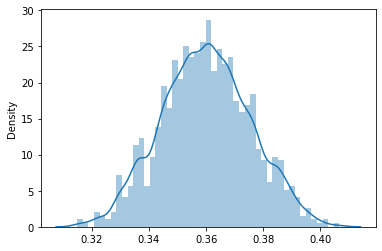

In [7]:
sns.distplot(opt_gap_dist.flatten())

## <span style="color:blue"> Conclusions: What did we learn? </span>

* Under the assumption of uniformly random allocations, the distribution of the OptimalityGap for 50 users and 10 grants appears to be normally distributed. This experiment did not provide evidence that supports the bimodal conjecture. 

* This experiment took 35 minutes. 

---

## <span style="color:red"> Potential Issues </span>

1. Number of users, grants, and trials is still relatively small.
2. The **opt_gap_helper.py** file has no test suite, no unit tests, and has not been validated.
3. We need to be careful generating random elements where we don't control the seed.
4. The assumption of uniform distribution is extremely unrealistic compared to actual data. In the future, let's experiment with different distributions (particularly geometric). 

---



## <span style="color:blue"> Conjectures and Future Questions </span>

1. Investigate for different numbers of users, grants and trials.
2. Validate the **opt_gap_helper** code.
3. Investigate for different distributions.
4. The optimality gap distribution will be symmetric under any symmetric distribution, since the pairwise qf function has symmetry. 

---

